#Program 5
***Read a dataset and perform unsupervised learning using SOM algorithm.***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from minisom import MiniSom

In [ ]:
data = load_iris()
X = data.data
y = data.target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

som = MiniSom(x=7, y=7, input_len=X.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(X_scaled)
som.train_random(data=X_scaled, num_iteration=100)

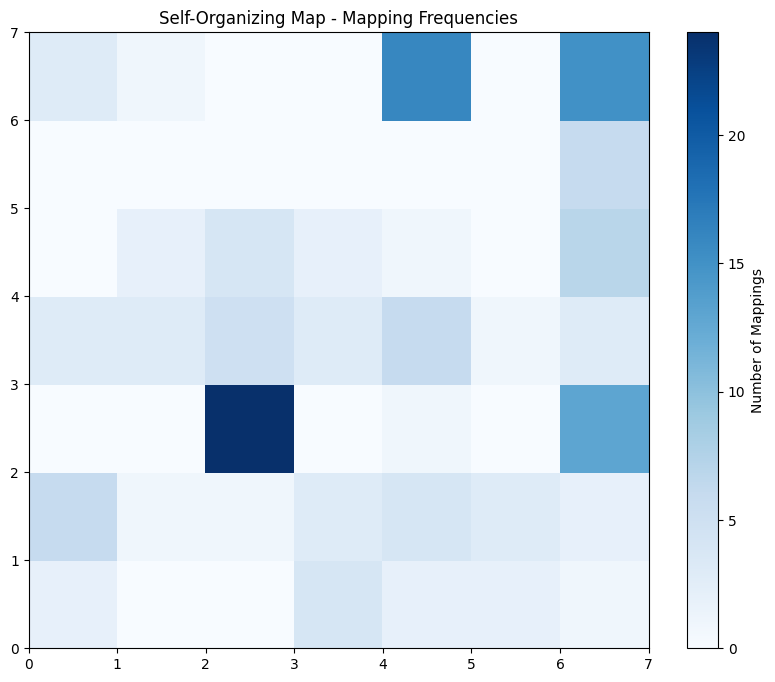

In [ ]:
plt.figure(figsize=(10, 8))
frequencies = np.zeros((7, 7))
for x in X_scaled:
    w = som.winner(x)
    frequencies[w[0], w[1]] += 1

plt.pcolor(frequencies.T, cmap='Blues')
plt.colorbar(label='Number of Mappings')
plt.title("Self-Organizing Map - Mapping Frequencies")
plt.show()

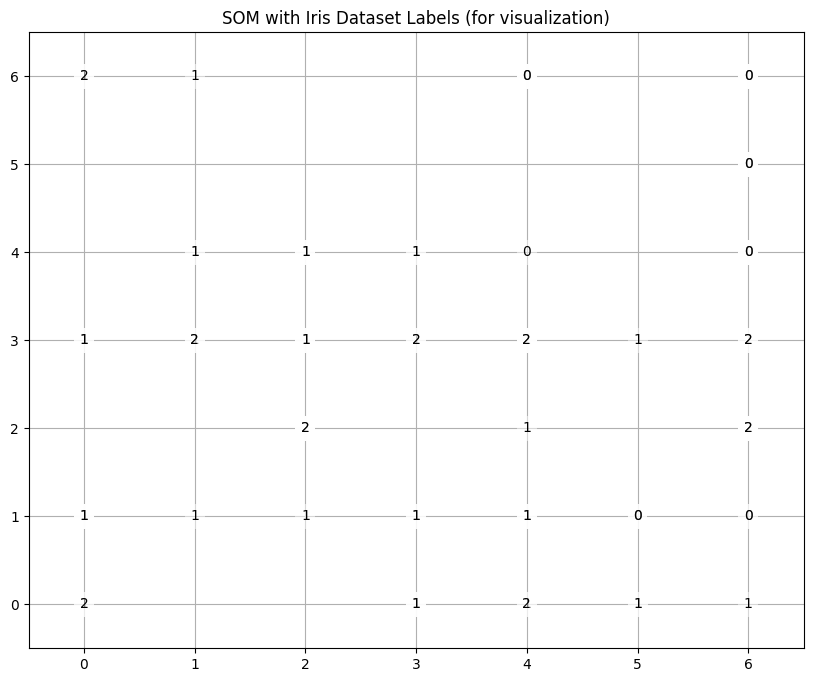

In [ ]:
plt.figure(figsize=(10, 8))
for i, x in enumerate(X_scaled):
    w = som.winner(x)
    plt.text(w[0], w[1], str(y[i]),
             ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.5, lw=0))

plt.title("SOM with Iris Dataset Labels (for visualization)")
plt.xlim(-0.5, 6.5)
plt.ylim(-0.5, 6.5)
plt.grid()
plt.show()